# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Bueno dado que estamos hablando del merca

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

# Proyecto: Análisis de mercado inmobiliario

# 1. Pensando como un/a Data Scientist
**Los datos que podrían ayudar a trabajar en el problema son:**
- **Precios** de propiedades que se encuentran en venta o alquiler.
- **Tipo** de propiedad (casa, departamento, ph)
- **Caracteríasticas** específicas de esas propiedades:
    1. Cantidad de ambientes y baños, a mayor cantidad de ambientes mayor es el precio del inmueble.
    2. Métros cuadrados cubiertos, a mayor metros cuadrados las propiedades deberían ser más caras.
    3. Si posee jardín, balcón, cochera, terrza; ya que disponer de estos espacios elevan el precio de la propiedad.
    4. Ubicación, barrios periféricos deberían tener un precio más bajo vis-a-vis barrios céntricos.
    5. Antigüedad o estado, ya que las propiedades de mayor antigüedad deberían ser más barata (por ejemplo los edificos de oficinas tienen clasificacón A+, A ó B dependiendo de la antigüedad del edificio).

Todos estos datos nos van a permitir obtener una relación entre el precio y cada una de las características de la propiedad, ya que suelen influir sobre el valor de las propiedades.

Estos datos los puedo obtener de bases de datos de inmobiliarias o de portales inmobiliarios. 




## 2 Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [198]:
# %load lib/utils.py
class utils:
    @staticmethod
    def open_csv(path):
        return pd.read_csv(path)

    @staticmethod
    def graph_by_property_value(property_name, property_value, order_array, ax1,ax2):
        a = sns.countplot(data = df[df.l2 == property_value],y=property_name, palette="Set3",ax=ax[ax1,ax2], order=order_array)
        a.set_title(property_value)
    
    

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Tareas Iniciales
1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [200]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [201]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_Proyecto_01_Datos_Properati.csv")

In [202]:
df.head()

start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta
3  2019-10-17  2019-12-23  ...            PH           Venta
4  2019-10-17  2020-03-11  ...            PH           Venta

[5 rows x 19 columns]

**Diccionario de datos del dataset de Properati**:

- **type** - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- **start_date** - Fecha de alta del aviso.
- **end_date** - Fecha de baja del aviso.
- **created_on** - Fecha de alta de la primera versión del aviso.
- **lat** - Latitud.
- **lon** - Longitud.
- **l1** - Nivel administrativo 1: país.
- **l2** - Nivel administrativo 2: usualmente provincia.
- **l3** - Nivel administrativo 3: usualmente ciudad.
- **rooms** - Cantidad de ambientes (útil en Argentina).
- **bedrooms** - Cantidad de dormitorios (útil en el resto de los países).
- **bathrooms** - Cantidad de baños.
- **surface_total** - Superficie total en m².
- **surface_covered** - Superficie cubierta en m².
- **price** - Precio publicado en el anuncio.
- **currency** - Moneda del precio publicado,
-**title** - Título del anuncio.
- **description** - Descripción del anuncio.
-**property type** - Descripción de la propiedad.
- **operation type** - Descripción de la operación.

In [203]:
df.describe()

lat            lon  ...  surface_covered         price
count  136735.000000  136701.000000  ...    125046.000000  1.466600e+05
mean      -34.604896     -58.465304  ...       112.818011  2.412211e+05
std         0.468428       0.486190  ...       916.857584  3.185195e+05
min       -35.318457    -180.000000  ...         1.000000  5.500000e+03
25%       -34.627667     -58.504012  ...        47.000000  1.110000e+05
50%       -34.600943     -58.443262  ...        68.000000  1.660000e+05
75%       -34.574600     -58.407586  ...       108.000000  2.650000e+05
max        85.051129     -57.805832  ...    126062.000000  3.243423e+07

[8 rows x 8 columns]

In [204]:
#Vamos a imprimir la cantidad de filas y columnas que hay dentro del dataset

df.shape

(146660, 19)

De acuerdo a esta salida con el método **shape()**, sabemos que esta base de datos contiene 146.660 filas y 19 columnas.

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

Entender la cantidad de valores faltantes es imprescindible para poder comprender la base de datos con  la que disponemos, con lo cual vamos a imprimar la cantidad de missing values por columna.

In [205]:
df.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Vamos a realizar una extracción de los valores faltantes por columna, mediante la visualizacion de un dataframe.

In [206]:
columnas_nulos = df.isnull().sum().sort_values(ascending =False)[df.isnull().sum().sort_values(ascending =False)>0]


In [207]:
df_n_nulos =pd.DataFrame({"Columnas NA's":columnas_nulos.index,
              "Cantidad de Nulos":columnas_nulos.values})
df_n_nulos

Columnas NA's  Cantidad de Nulos
0  surface_covered              21614
1    surface_total              20527
2              lon               9959
3              lat               9925
4        bathrooms               5957

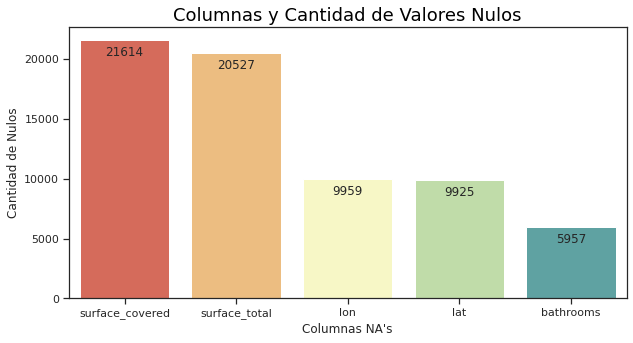

In [208]:
    plt.figure(figsize=(10,5))
    sns.set(style="ticks")
    g = sns.barplot(data = df_n_nulos, x="Columnas NA's", y = "Cantidad de Nulos",palette = "Spectral")
    plt.title("Columnas y Cantidad de Valores Nulos", fontsize=18, color="black")
    for p in g.patches:
        g.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=12,
                       xytext = (0, -12), 
                       textcoords = 'offset points')
    plt.show()

In [209]:
suma_na = df["lat"].isna().sum() + df["lon"].isna().sum() + df["bathrooms"].isna().sum() + df["surface_total"].isna().sum() + df["surface_covered"].isna().sum()
suma_na

67982

En total, hay **67982** datos faltantes en el dataset.

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [210]:
#Ordenamiento del dataset segun tipo de propiedad
print(df.property_type.value_counts())


Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


La tipos de propiedades que podemos ver en este dataset son 10:
- Departamentos
- Casa
- PH
- Lote
- Oficinas
- Otros
- Local Comercial
- Casa de campo
- Depósito
- Cochera

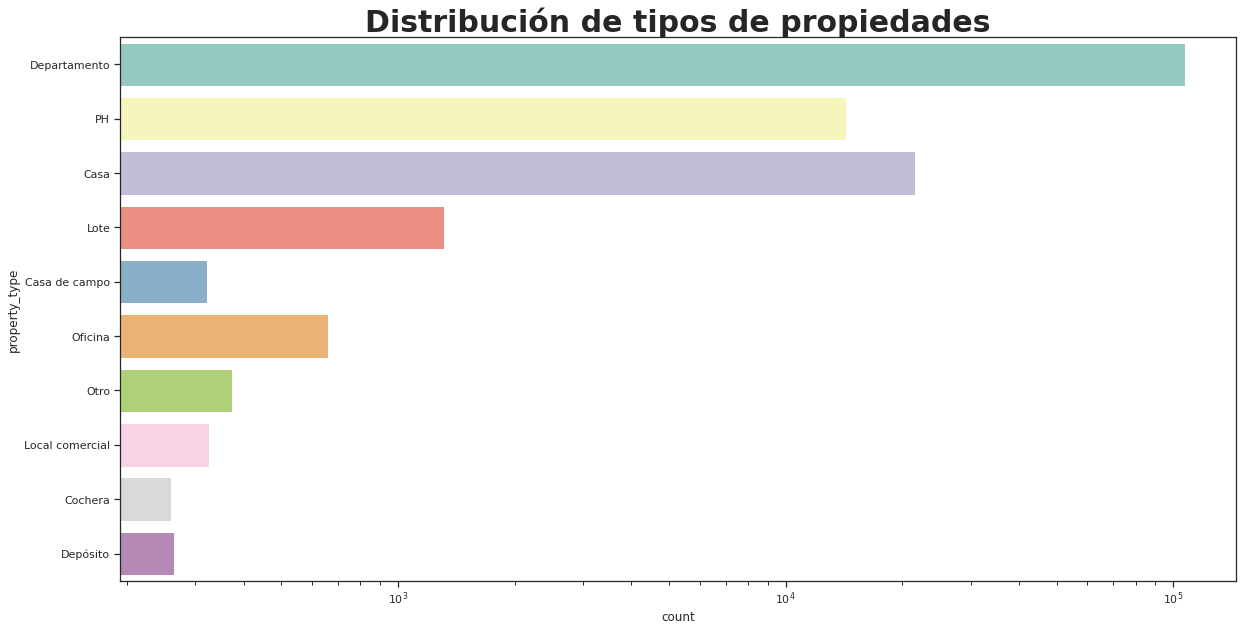

In [211]:
fig, ax = plt.subplots(figsize=(20, 10))
a = sns.countplot(y = "property_type", data=df, palette="Set3")
plt.title("Distribución de tipos de propiedades", size = 30, fontweight= "bold")
a.set_xscale("log")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

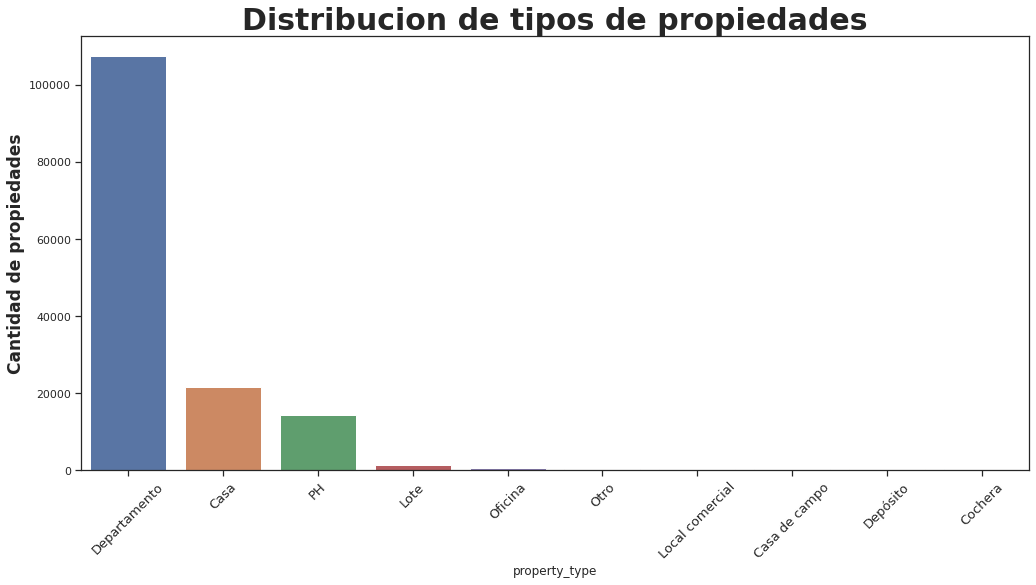

In [212]:
#Mismo grafico pero en sentido vertical
plt.figure(figsize=(17,8))
df.sort_values("property_type")
sns.countplot(x= df.property_type, data = df["property_type"], order=df.property_type.value_counts().index)
plt.title("Distribucion de tipos de propiedades", size = 30, fontweight= "bold")
plt.ylabel("Tipos de propiedades", size=17, fontweight= "bold")
plt.ylabel("Cantidad de propiedades", size=17, fontweight= "bold")
plt.xticks(rotation= 45, size=13)

### Regiones

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [213]:
df1 = df.rename(columns= {"l2":"Region1" ,
                          "l3":"Region2"})
df1.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'Region1',
       'Region2', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type'],
      dtype='object')

In [214]:
print(df1.Region2.value_counts())

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: Region2, Length: 89, dtype: int64


Zonas de Bs. As. y cantidad de instancias por cada una:
Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


Text(0.5, 1.0, 'Cantidad de propiedades por cada barrio')

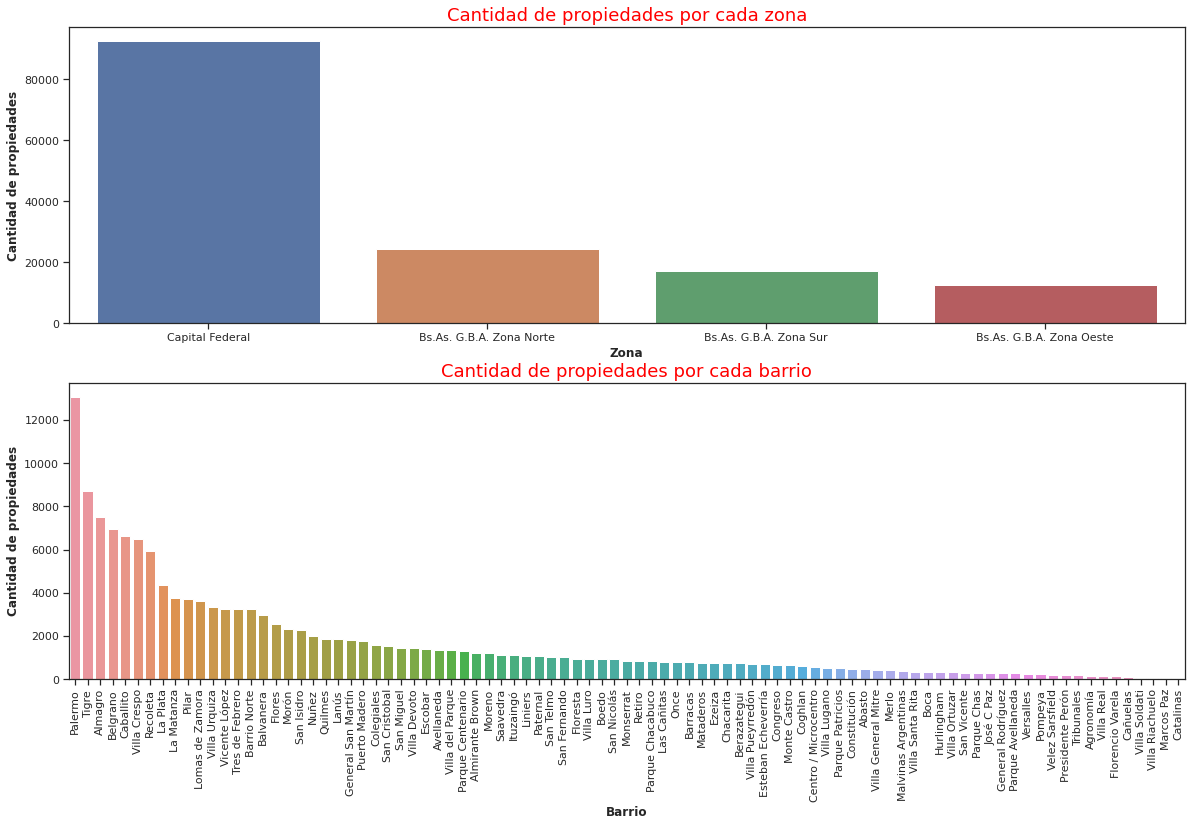

In [215]:
print("Zonas de Bs. As. y cantidad de instancias por cada una:\n", df["l2"].value_counts(), sep = "")

plt.figure(figsize = (20,12))


plt.subplot(2,1,1)
sns.countplot(x = "l2", data = df, order = df['l2'].value_counts().index)
plt.xlabel("Zona", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada zona", fontsize=18, color="red")

plt.subplot(2,1,2)
sns.countplot(x = "l3", data = df, order = df['l3'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel("Barrio", fontweight = "black", fontsize = 12)
plt.ylabel("Cantidad de propiedades", fontweight = "black", fontsize = 12)
plt.title("Cantidad de propiedades por cada barrio", fontsize=18, color="red")

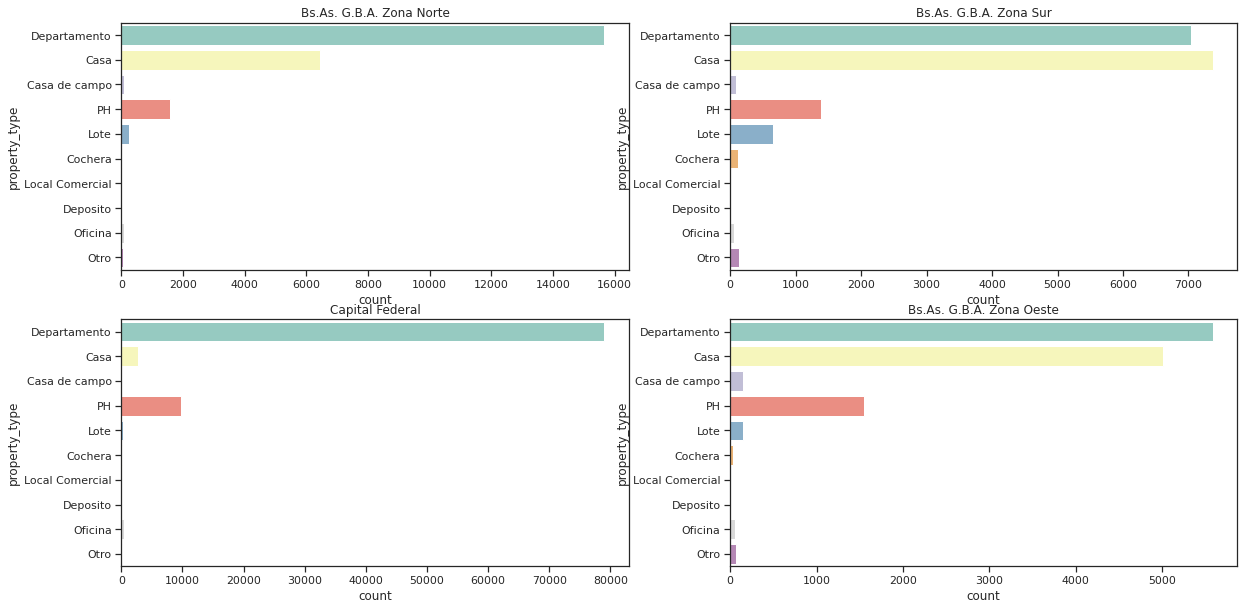

In [216]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))
order = ['Departamento', 'Casa', 'Casa de campo', 'PH', 'Lote','Cochera','Local Comercial','Deposito','Oficina','Otro']

utils.graph_by_property_value("property_type", "Bs.As. G.B.A. Zona Norte", order, 0,0)
utils.graph_by_property_value("property_type", "Bs.As. G.B.A. Zona Sur", order, 0,1)
utils.graph_by_property_value("property_type", "Capital Federal", order, 1,0)
utils.graph_by_property_value("property_type", "Bs.As. G.B.A. Zona Oeste", order, 1,1)

### Filtrando el Dataset

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [217]:
#Seleccionamos los tres tipos de propiedad más abundantes
mask_type = df.property_type.isin(["Departamento", "Casa", "PH"])
prop_type = df[mask_type]

#Nos quedamos sólo con las ubicadas en Capital Federal
mask_loc = prop_type.l2 == "Capital Federal"
seleccion = prop_type[mask_loc]

print(seleccion["property_type"].value_counts())

Departamento    79029
PH               9764
Casa             2692
Name: property_type, dtype: int64


In [218]:
print("Tamaño del Data Frame filtrado:", seleccion.shape)

Tamaño del Data Frame filtrado: (91485, 19)


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

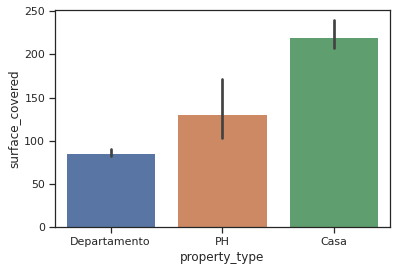

In [219]:
sns.barplot(data=seleccion, x="property_type", y="surface_covered")

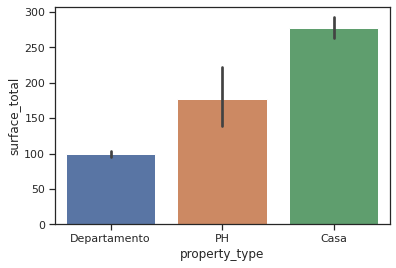

In [220]:
sns.barplot(data=seleccion, x="property_type", y="surface_total")

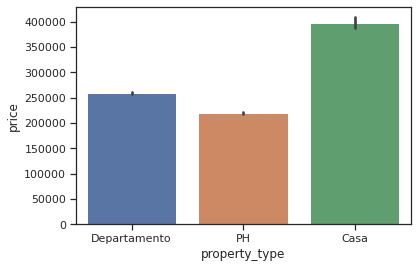

In [221]:
sns.barplot(data=seleccion, x="property_type", y="price")

2.14 Notamos que las Casas presentan mayor superficie que los PH y los departamentos. Esta relacion se da tanto tomando superficie total como superficie cubierta. Cuando evaluamos los precios, notamos que PH es el metro cuadrado mas economico para comprar. Los departamentos presentan el metro cuadrado mas caro, en relacion a la supercie construida.

2.15 Debemos Estudiar la correlación entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered, price. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad? Elegimos superficie total y precio y realizamos graficos de cajas.

2.16 Como notamos que hay valores atipicos, filtramos los datos nuevamente. Tanto para surface_total y para price, establecemos un maximo y un minimo.

Departamentos entre 15 y 150 metros cuadrados. Precio menor a 550.000 pesos.

PH entre 50 y 350 metros cuadrados. Precio menor a 450.000 pesos.

Casa entre 25 y 800 metros cuadrados. Precio menor a 800.000 pesos.

**(*)** El criterio para realizar ese filtro en los metros cuadrados se eligió en base al siguiente dataset recopilado por la Oficina de Estadísticas de la Capital Federal, República Argentina. **Link:** https://www.estadisticaciudad.gob.ar/eyc/?p=56531

Vamos a visualizar a todo esto previamente dicho mediante boxplots

In [222]:
#Eliminamos los instancias con valores faltantes para las variables de nuestros interés en este momento 
seleccion = seleccion.dropna(subset = ["bathrooms", "surface_total", "surface_covered"])

In [223]:
#Eliminamos las propiedades que contengan valores de "superficie cubierta" mayores a la "superficie total" ya que no serían datos correctos
seleccion = seleccion[(seleccion.surface_total >= seleccion.surface_covered)]

In [224]:
seleccion = seleccion.loc[:,  ["property_type","rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

0 rooms
1 bedrooms
2 bathrooms
3 surface_total
4 surface_covered
5 price


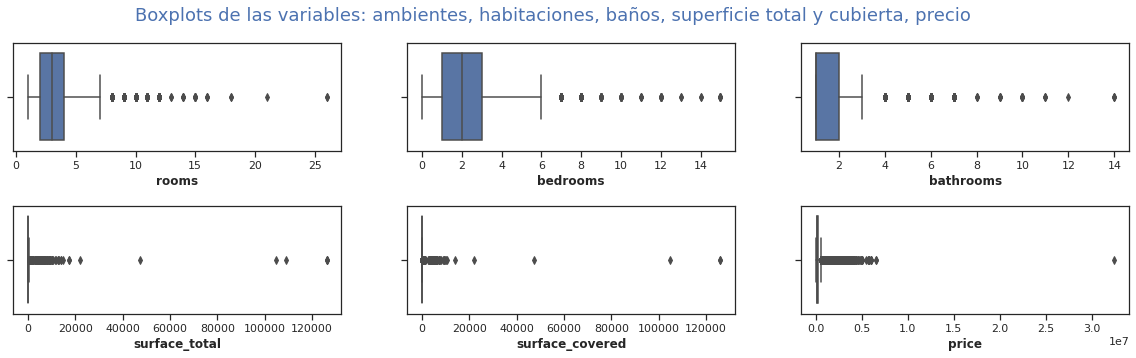

In [225]:
plt.figure(figsize = (20,5))
for i, col in enumerate(seleccion.columns[1:]):
    print(i, col)
    plt.suptitle("Boxplots de las variables: ambientes, habitaciones, baños, superficie total y cubierta, precio", fontsize=18, color = "b")
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel(str(col), fontweight = "black", fontsize = 12)
    g = sns.boxplot(x=col, data=seleccion)
    
plt.show()

A continuación vamos a proceder a visualizar los boxplots de cada tipo de propiedad con las variables filtradas.

Total: 68941
Filtrado: 59940
Se filta el 13.056091440507103% de los datos que corresponden a departamentos


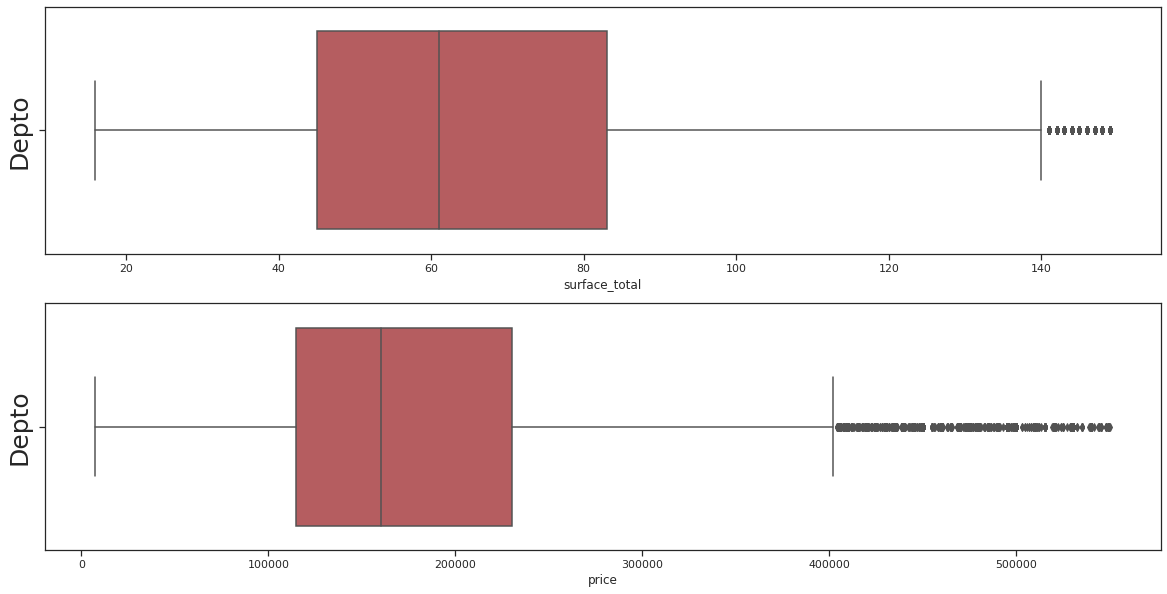

In [226]:
plt.figure(figsize=(20, 10))

dpto_mask = ((seleccion['surface_total'] >= seleccion['surface_covered']) & 
                        (seleccion['surface_total'] < 150) & 
                        (seleccion['surface_total'] > 15) & 
                        (seleccion['price'] < 550000) &
                        (seleccion['property_type'] == 'Departamento'))
plt.subplot(2,1,1)
sns.boxplot(data = seleccion[dpto_mask], x = 'surface_total', color = 'r')
plt.ylabel('Depto', size = 25)

plt.subplot(2,1,2)
sns.boxplot(data = seleccion[dpto_mask], x = 'price', color = 'r')
plt.ylabel('Depto', size = 25)

#Haciendo este filtro, eliminamos x instancias. Chequear si el volumen afecta al total.
print("Total: " + str(seleccion[seleccion['property_type'] == 'Departamento'].shape[0]))
print("Filtrado: " + str(seleccion[dpto_mask].shape[0]))
porcentaje_filtrado = (seleccion[dpto_mask].shape[0]* 100) / seleccion[seleccion['property_type'] == 'Departamento'].shape[0]
print("Se filta el " + str(100-porcentaje_filtrado) + "% de los datos que corresponden a departamentos")

Total: 9542
Filtrado: 59940
Se filta el 13.056091440507103% de los datos que corresponden a departamentos


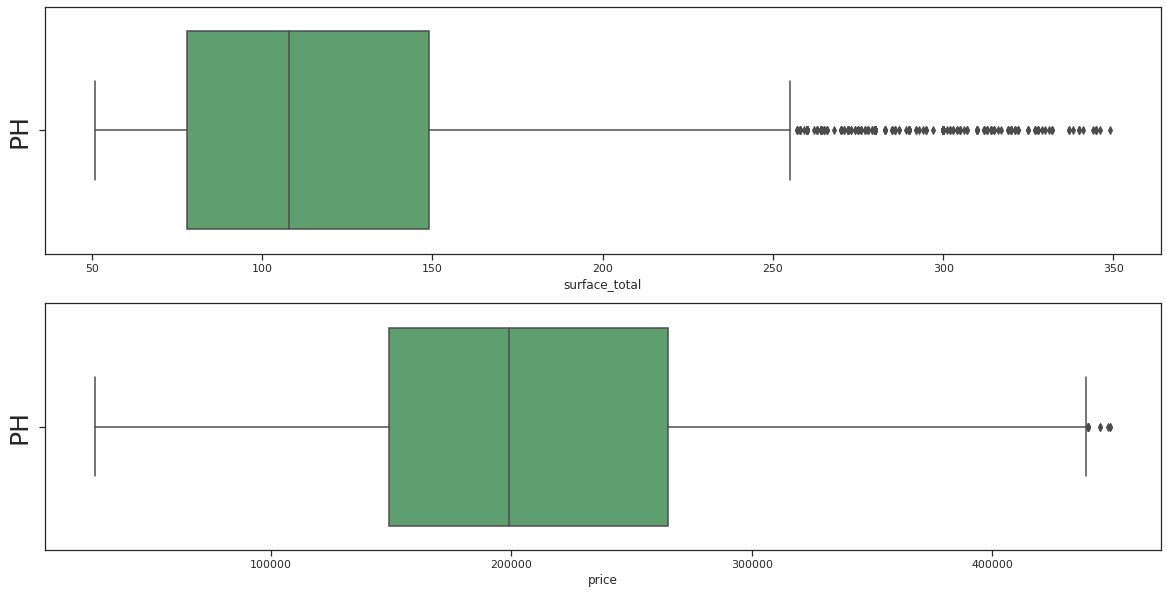

In [227]:
plt.figure(figsize=(20, 10))

ph_mask = ((seleccion['surface_total'] >= seleccion['surface_covered']) & 
                        (seleccion['surface_total'] < 350) & 
                        (seleccion['surface_total'] > 50) & 
                        (seleccion['price'] < 450000) &
                        (seleccion['property_type'] == 'PH'))

plt.subplot(2,1,1)
sns.boxplot(data = seleccion[ph_mask], x = 'surface_total', color = 'g')
plt.ylabel('PH', size = 25)

plt.subplot(2,1,2)
sns.boxplot(data = seleccion[ph_mask], x = 'price', color = 'g')
plt.ylabel('PH', size = 25)

#Haciendo este filtro, eliminamos x instancias. Chequear si el volumen afecta al total.
print("Total: " + str(seleccion[seleccion['property_type'] == 'PH'].shape[0]))
print("Filtrado: " + str(seleccion[dpto_mask].shape[0]))
porcentaje_filtrado = (seleccion[dpto_mask].shape[0]* 100) / seleccion[seleccion['property_type'] == 'Departamento'].shape[0]
print("Se filta el " + str(100-porcentaje_filtrado) + "% de los datos que corresponden a departamentos")

Total: 1975
Filtrado: 1845
Se filta el 6.582278481012665% de los datos que corresponden a departamentos


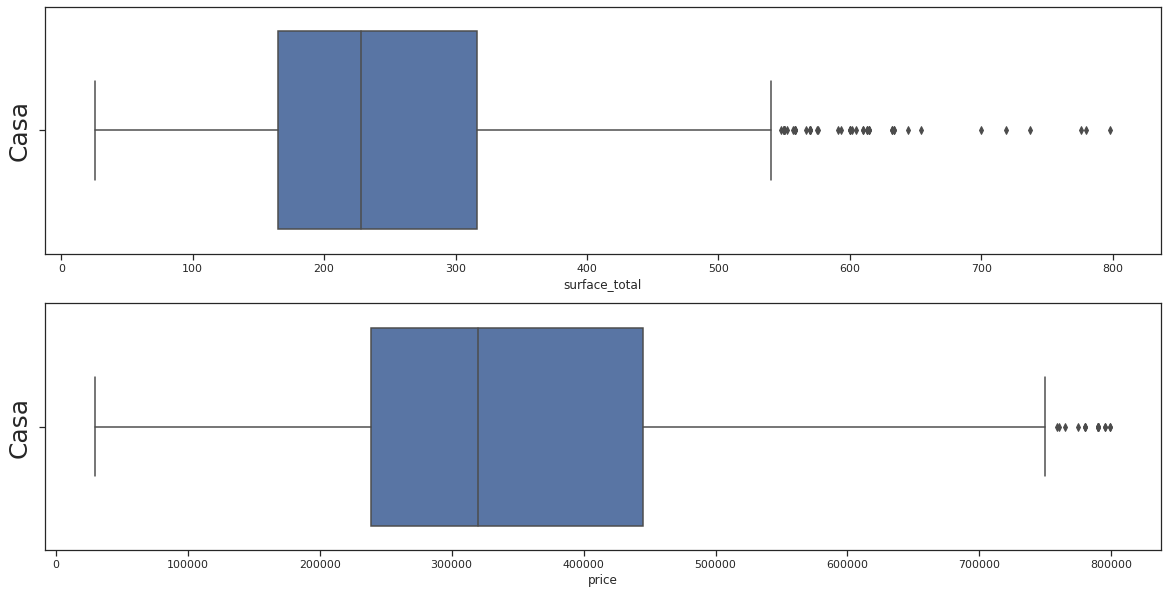

In [228]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

casa_mask = ((seleccion['surface_total'] >= seleccion['surface_covered']) & 
                        (seleccion['surface_total'] < 800) & 
                        (seleccion['surface_total'] > 25) & 
                        (seleccion['price'] < 800000) &
                        (seleccion['property_type'] == 'Casa'))

plt.subplot(2,1,1)
sns.boxplot(data = seleccion[casa_mask], x = 'surface_total', color = 'b')
plt.ylabel('Casa', size = 25)

plt.subplot(2,1,2)
sns.boxplot(data = seleccion[casa_mask], x = 'price', color = 'b')
plt.ylabel('Casa', size = 25)

#Haciendo este filtro, eliminamos x instancias. Chequear si el volumen afecta al total.
print("Total: " + str(seleccion[seleccion['property_type'] == 'Casa'].shape[0]))
print("Filtrado: " + str(seleccion[casa_mask].shape[0]))
porcentaje_filtrado = (seleccion[casa_mask].shape[0]* 100) / seleccion[seleccion['property_type'] == 'Casa'].shape[0]
print("Se filta el " + str(100-porcentaje_filtrado) + "% de los datos que corresponden a departamentos")

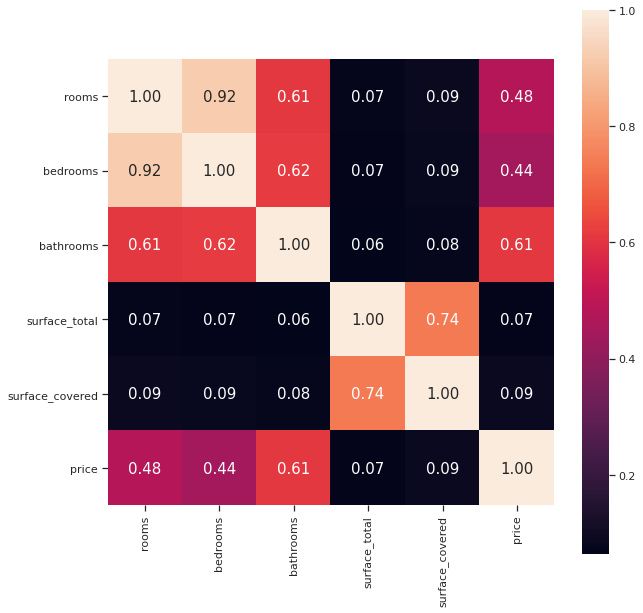

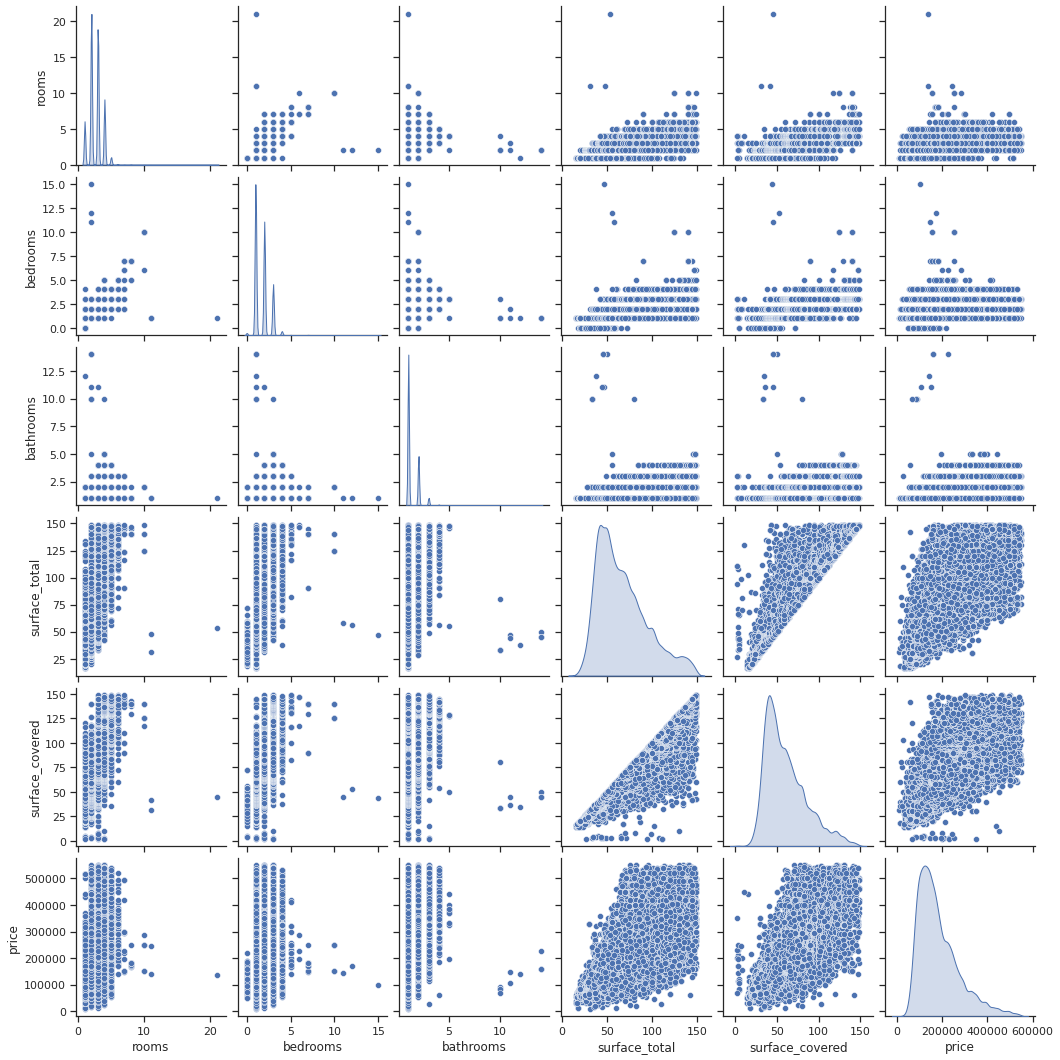

In [229]:
# Correlaciones
plt.figure(figsize=(10,10))
corr_dpto = seleccion[seleccion["property_type"] == "Departamento"].corr()
sns.heatmap(corr_dpto, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})
sns.pairplot(data = seleccion[dpto_mask], diag_kind = 'kde')

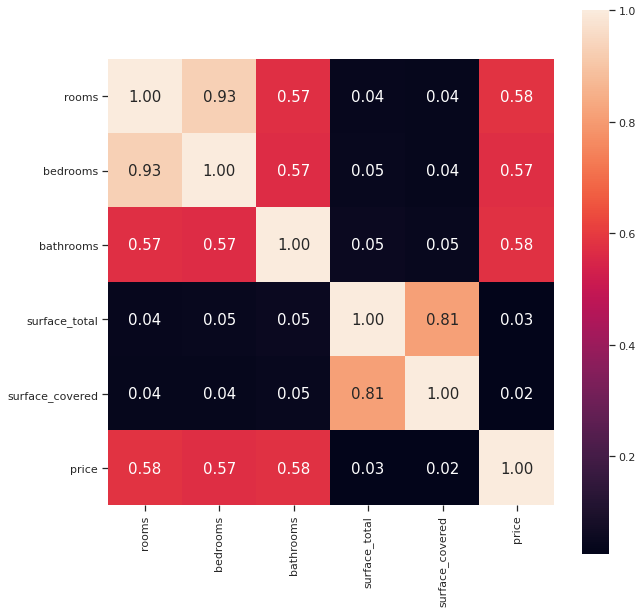

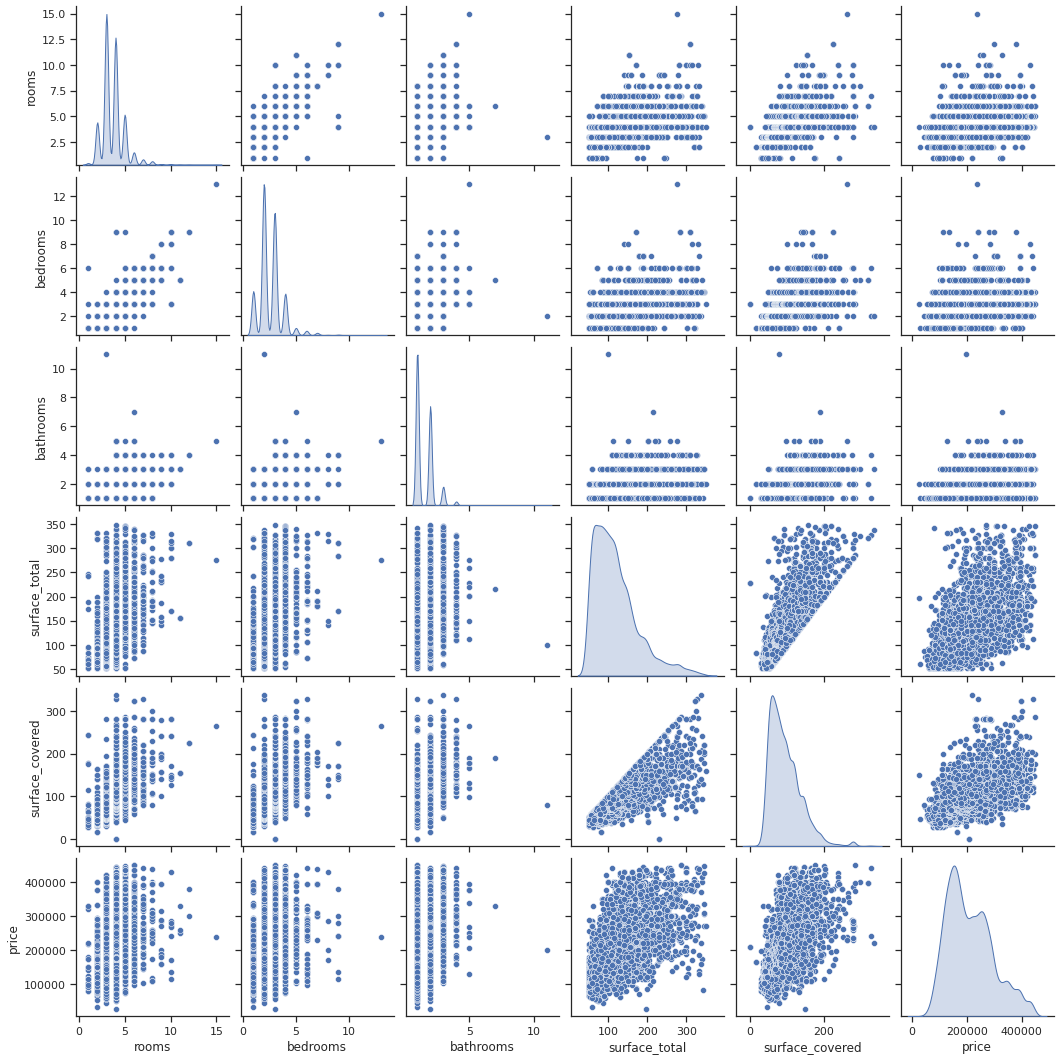

In [230]:
# Correlaciones
plt.figure(figsize=(10,10))
corr_ph = seleccion[seleccion["property_type"] == "PH"].corr()
sns.heatmap(corr_ph, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})
sns.pairplot(data = seleccion[ph_mask], diag_kind = 'kde')

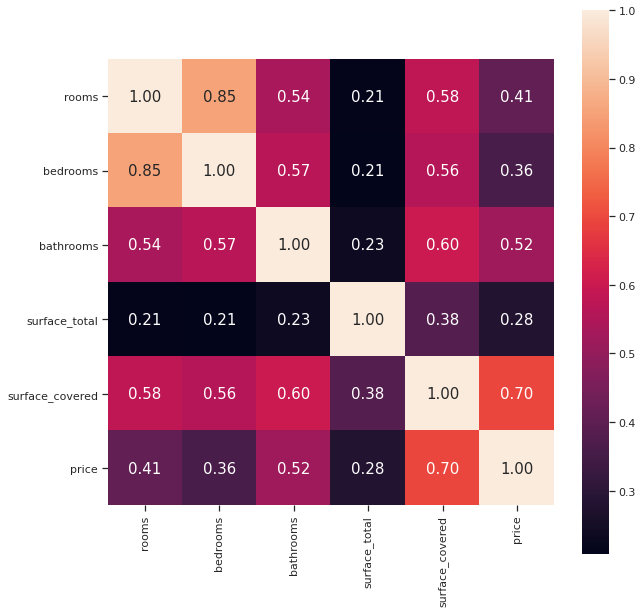

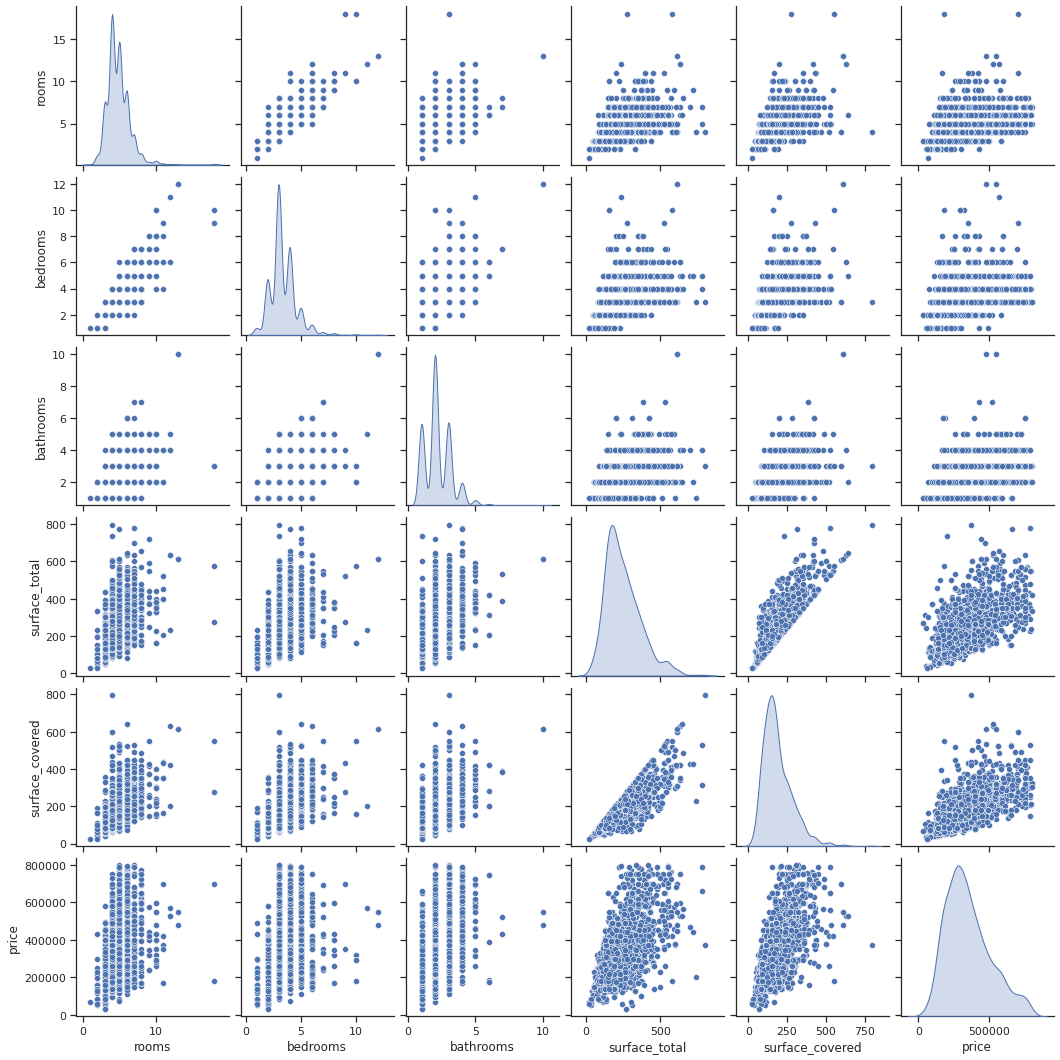

In [231]:
# Correlaciones
plt.figure(figsize=(10,10))
corr_casa = seleccion[seleccion["property_type"] == "Casa"].corr()
sns.heatmap(corr_casa, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})
sns.pairplot(data = seleccion[casa_mask], diag_kind = 'kde')

En los heatmaps para Casa, PH y Departamentos notamos que hay correlacion entre surface_total y price algo igual que con surface_covered y price. Esto mismo se refleja en el Pair plot.

### **Correlaciones** 

Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

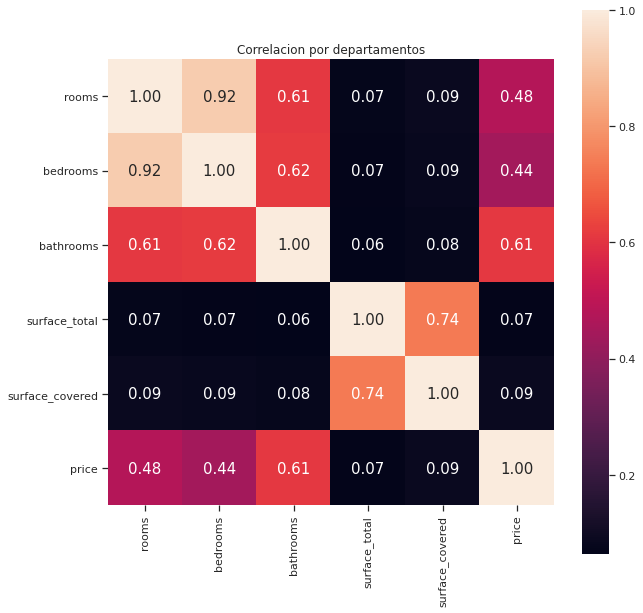

In [232]:
# Correlaion por departamento
plt.figure(figsize=(10,10))
corr_dpto = seleccion[seleccion["property_type"] == "Departamento"].corr()
sns.heatmap(corr_dpto, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})
plt.title("Correlacion por departamentos")
plt.show()

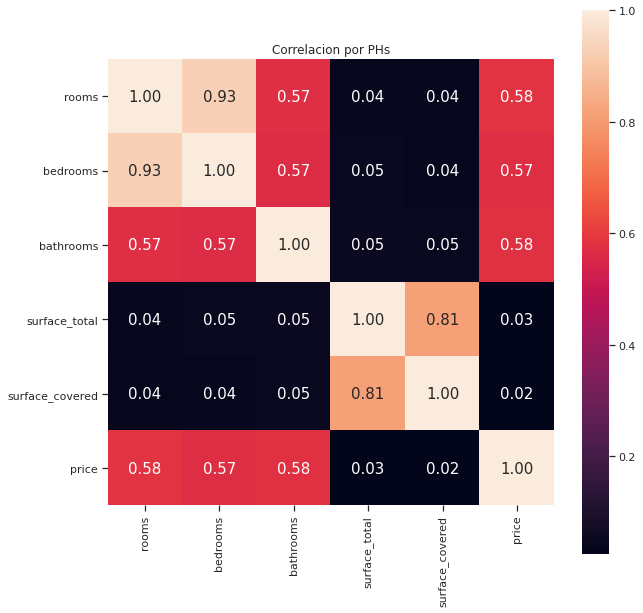

In [233]:
# Correlaciones
plt.figure(figsize=(10,10))
corr_ph = seleccion[seleccion["property_type"] == "PH"].corr()
sns.heatmap(corr_ph, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})
plt.title("Correlacion por PHs")
plt.show()

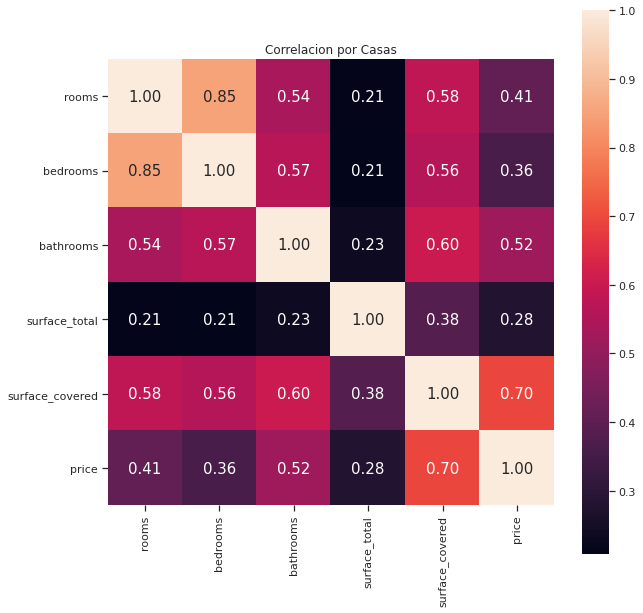

In [234]:
# Correlaciones
plt.figure(figsize=(10,10))
corr_casa = seleccion[seleccion["property_type"] == "Casa"].corr()
sns.heatmap(corr_casa, cbar = True, square = True, annot = True, fmt= ".2f", annot_kws = {"size":15})
plt.title("Correlacion por Casas")
plt.show()

Text(0.5, 1.0, 'PH')

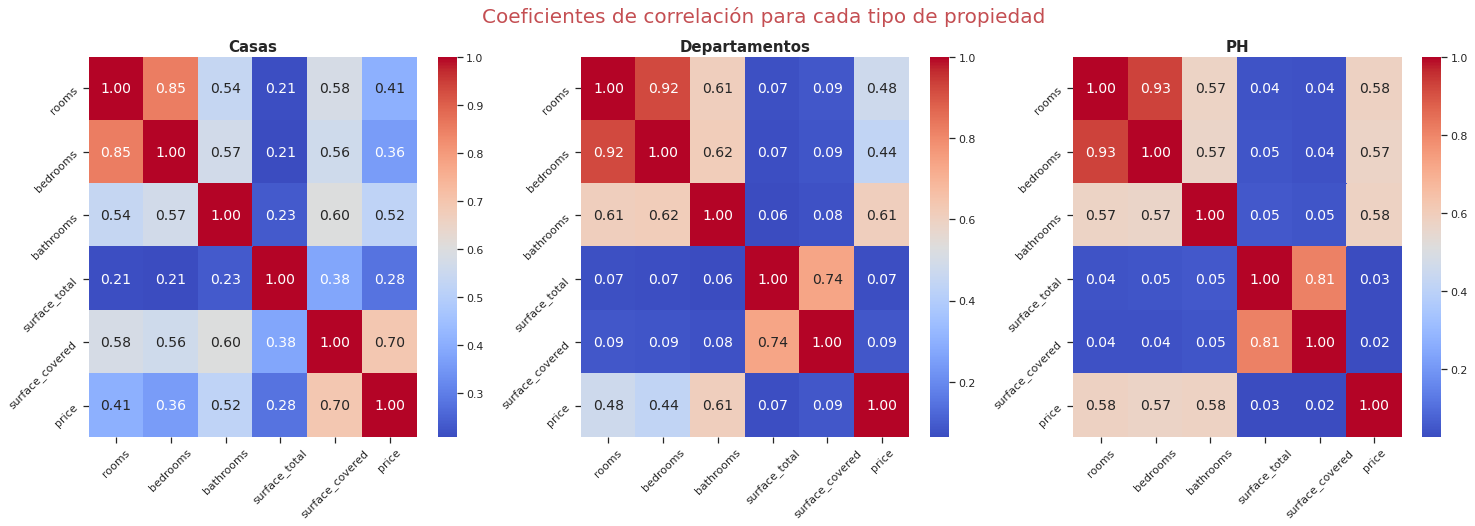

In [235]:

plt.figure(figsize=(25,7))
plt.suptitle("Coeficientes de correlación para cada tipo de propiedad", fontsize = 20, color = "r")

plt.subplot(1,3,1)
sns.heatmap(corr_casa, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Casas", fontweight = "black", fontsize = 15)

plt.subplot(1,3,2)
sns.heatmap(corr_dpto, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("Departamentos", fontweight = "black", fontsize = 15)

plt.subplot(1,3,3)
sns.heatmap(corr_ph, cbar = True, annot=True, fmt= '.2f',annot_kws={'size': 14}, cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title("PH", fontweight = "black", fontsize = 15)

A partir de los valores obtenidos se pueden apreciar varias cosas:
* En orden decreciente, las variables que poseen un coeficiente de correlación con la variable "Precio" superior a 0.5 son, "Superfie cubierta", "Superficie total, "Baños", "Ambientes" y "Habitaciones".
* Las variables "Superficie Total" y "Superficie cubierta", como es de esperarse, están altamente relacionadas.
* Al igual que las superficies, las variables "Ambientes" y "Habitaciones" también están muy relacionadas entre sí.
* En general se puede apreciar una gran relación entre todas las variables, excepto "lat", y "lon"

A continuación se realizó el mismo análisis pero para cada tipo de propiedad por separado.

Al dividir el análisis por el tipo de propiedad podemos ver que para el caso de los Departamentos se mantienen las mismas relaciones vistas anteriormente. Para el caso de los PH también se mantienen en general las mismas conclusiones que antes pero con valores algo menores. Sin embargo, para las Casas se puede apreciar una considerable disminución en los valores de correlación, principalmente para las variables "Ambientes", "Habitaciones" y "Baños", también se puede apreciar un aumento considerable en el coeficiente de correlación para las variables "Precio" y "lat".

## 3 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


**Pregunta a responder**: ¿Cual es el barrio de mayores ventas de este dataset?


A continuación, vamos a intentar responder a la pregunta de que barrio fue el que tuvo mayores ventas durante el periodo de tiempo que hay en este dataset.

Para ello nos vamos a valer de dos variables, una será la variable **end_date** (que representa a la fecha de cierre del aviso) y la otra será la variable **l3** (que representa a los distintos barrios de Capital Federal y Buenos Aires).

Cabe resaltar, que para poder responder a esta pregunta vamos a recurrir a ciertos supuestos que nos van a permitir poder responder nuestra pregunta.

Asumimos que la variable end_date, refleja que solo se cierra la oferta una vez que se vende o alquila la propiedad.


Una vez dicho esto, vamos a proceder a trabajar con los datos. 

Para ello vamos a agrupar a los distintos barrios analizadas conforme a la fecha de vencimiento de su publicación. Para ello, vamos a utilizar el método **groupby**


In [236]:
barrios = df["end_date"].groupby(df["l3"])

In [237]:
cierre = pd.DataFrame(barrios.count())
cierre.to_excel("propiedades.xlsx")

In [238]:
cierre

end_date
l3                        
Abasto                 462
Agronomía              165
Almagro               7527
Almirante Brown       1228
Avellaneda            1370
...                    ...
Villa Riachuelo         42
Villa Santa Rita       354
Villa Soldati           69
Villa Urquiza         3339
Villa del Parque      1361

[89 rows x 1 columns]

In [239]:
df1 = pd.read_excel("propiedades.xlsx")
df1

l3  end_date
0             Abasto       462
1          Agronomía       165
2            Almagro      7527
3    Almirante Brown      1228
4         Avellaneda      1370
..               ...       ...
84   Villa Riachuelo        42
85  Villa Santa Rita       354
86     Villa Soldati        69
87     Villa Urquiza      3339
88  Villa del Parque      1361

[89 rows x 2 columns]

In [240]:
df1 = df1.sort_values("end_date", ascending= False)

In [241]:
!pip install plotly

In [242]:
import plotly.express as px
df1 = df1.sort_values("end_date", ascending= False)
fig = px.bar(df1, x='l3', y='end_date')
fig.show()

Hay posibles sesgos ya que al haber elegido la variable de cancelación de las ofertas, podemos estar considerando observaciones que se cancelaron el mismo día de su publicación pero no por ventas, con lo que podríamos estar contando ventas que no sucedieron.

Una posibles solución sería hacer un cruce de datos con algún dataset de algún organismo público, si es que hubiese, que recopile información de ventas de inmuebles.

Factores como la distribución del ingreso y la estabilidad económica de las personas que compraron esos inmuebles explican la distribución de las ventas, ya que Palermo es un área de las más caras de la ciudad de Buenos Aires (siendo una posibildad para un rango pequeño de consumidores).

## 4 Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [243]:
seleccion_ML = df[(df.property_type == "Departamento") | (df.property_type == "PH") | (df.property_type == "Casa")]
seleccion_ML = seleccion_ML[seleccion_ML.l2 == "Capital Federal"]
print(seleccion_ML.shape)

(91485, 19)


In [244]:
seleccion_ML = seleccion_ML[(15 <= seleccion_ML.surface_total) & (seleccion_ML.surface_total <= 1000)]

In [245]:
seleccion_ML = seleccion_ML[seleccion_ML.price <= 4000000]

In [246]:
seleccion_ML_1 = seleccion_ML[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [247]:
seleccion_ML_1 = seleccion_ML_1.dropna()

In [248]:
print(seleccion_ML_1.shape)

(81019, 6)


In [249]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Benchmark**

Como modelo base se utilizó un árbol de decisión de profundidad 8, y con sólo dos variables independientes (Superficie total y cubierta), las cuales fueron las que presentaron los valores más altos de correlación con la variable dependiente Precio.

En primer lugar se pensó en una regresión lineal pero luego se descartó debido a la gran correlación existente entre las variables independientes y también porque, si bien, la relación entre el precio y las variables (sobre todo las superficies) tiene una tendencia a una relación lineal, existe mucha variabilidad y no se obtendrían buenos resultados. Finalmente se obtó por un árbol de decisión sencillo, utilizando solo las dos variables independientes que mostraron los valores más altos de correlación con la variable Precio, y debido a que ya se estaban utilizando pocas variables, se le asignó una profundidad intermedia.

In [250]:
propiedades = df
seleccion_ML = propiedades[(propiedades.property_type == "Departamento") | (propiedades.property_type == "PH") | (propiedades.property_type == "Casa")]
seleccion_ML = seleccion_ML[seleccion_ML.l2 == "Capital Federal"]
print(seleccion_ML.shape)

(91485, 19)


In [251]:
seleccion_ML = seleccion_ML[(15 <= seleccion_ML.surface_total) & (seleccion_ML.surface_total <= 1000)]

In [252]:
seleccion_ML = seleccion_ML[seleccion_ML.price <= 4000000]

In [253]:
seleccion_ML_1 = seleccion_ML[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [254]:
seleccion_ML_1 = seleccion_ML_1.dropna()

In [255]:
print(seleccion_ML_1.shape)

(81019, 6)


In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

###**Benchmark**

Como modelo base se utilizó un árbol de decisión de profundidad 8, y con sólo dos variables independientes (cubierta), la cual fue una de las que presentaron los valores más altos de correlación con la variable dependiente Precio.

En primer lugar se pensó en una regresión lineal pero luego se descartó debido a la gran correlación existente entre las variables independientes y también porque, si bien, la relación entre el precio y las variables (sobre todo las superficies) tiene una tendencia a una relación lineal, existe mucha variabilidad y no se obtendrían buenos resultados. Finalmente se decidio por un árbol de decisión sencillo, utilizando solo las dos variables independientes que mostraron los valores más altos de correlación con la variable Precio, y debido a que ya se estaban utilizando pocas variables, se le asignó una profundidad intermedia.

In [257]:
X_bm = seleccion_ML_1[["surface_covered"]]
y_bm = seleccion_ML_1["price"]

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X_bm, y_bm, test_size = 0.3, random_state = 42)

In [259]:
tree_bm = DecisionTreeRegressor(max_depth = 2)

In [260]:
model = tree_bm.fit(X_train, y_train)

In [261]:
y_test_pred = tree_bm.predict(X_test)
y_train_pred = tree_bm.predict(X_train)

Para evaluar el desempeño de los modelos se utilizó el RMSE (Raíz del error cuadrado promedio), el cual es una de las métricas utilizadas para evaluar modelos de regresión. Las métricas utilizadas para evaluar los modelos de regresión, en su mayoría, miden el error en las predicciones.

RMSE, a diferencia de MAE (Error absoluto promedio), es más sensible a los errores extremos por lo cual, cuanto menor sea su valor vamos a tener menos errores extremos, lo cual indicaría que nuestro modelo está realizando mejor la predicción. A su vez, al evaluar el RMSE tanto en el conjunto utilizado para Train como para Test, podemos observar si hay overfiting.

In [262]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 206608.3616898628
Raíz del error cuadrático medio en Test: 209013.62022782397


In [263]:
y_hat = model.predict(X_train)
SS_Residual = sum((y_train-y_hat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_bm)-1)/(len(y_bm)-X_bm.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5177036018094843 0.5176976487823641


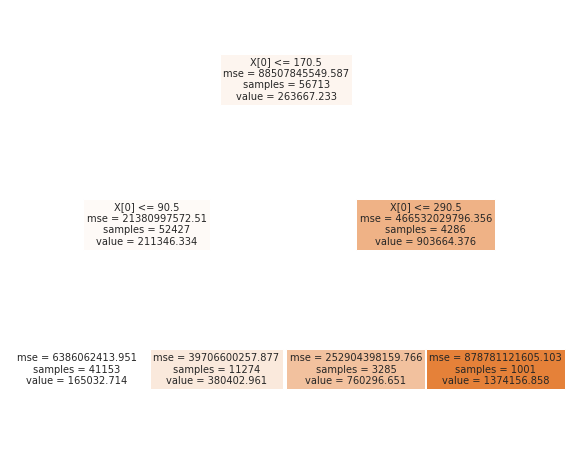

In [313]:
from sklearn import tree
plt.figure(figsize = (10,8))
tree.plot_tree(tree_bm, filled = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Valores predichos del Precio (USD)')

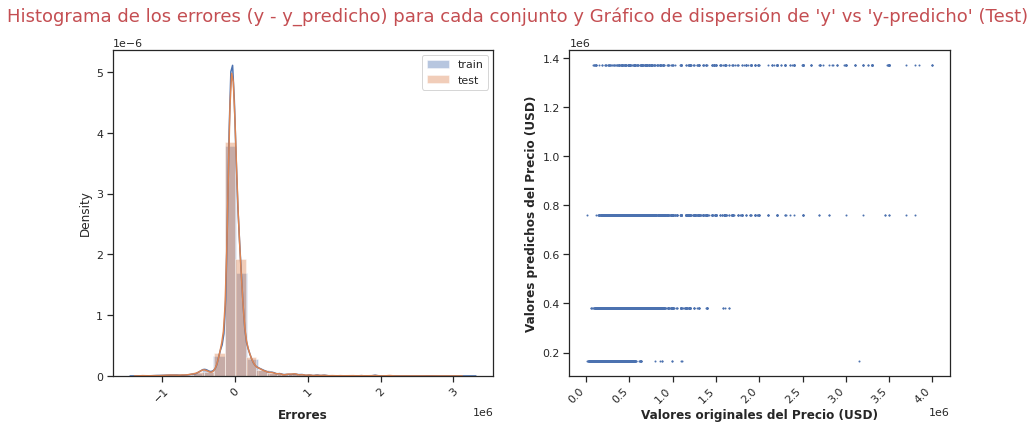

In [265]:
plt.figure(figsize = (15,6))
plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
plt.xlabel("Errores", fontweight = "black", fontsize = 12)
plt.xticks(rotation = 45)
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_test, y_test_pred, s=1) 
plt.xticks(rotation = 45, horizontalalignment="right")
plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)



Adicionalmente, vamos a probar un modelo de regresión sobre las dos variables que mostraron mayor correlación con el precio de los inmuebles (superficie cubiertas y superficies totales) y vamos a medir su eficacia mediante la interpretación del R cuadrado.

In [266]:
X_bm = seleccion_ML_1[["surface_covered", "surface_total"]]
y_bm = seleccion_ML_1["price"]

In [267]:
modelo = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_bm, y_bm, test_size = 0.3, random_state = 42)
modelo.fit(X_train, y_train)
print(modelo.coef_, modelo.intercept_)

[ 130.64104315 2532.65041154] 11306.04642418123


Sacamos el RMSE para el modelo lineal.

In [268]:
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)
    
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

Raíz del error cuadrático medio en Train: 216278.7175940256
Raíz del error cuadrático medio en Test: 218957.05421795268


In [269]:
X = seleccion_ML_1[[ "surface_total", "surface_covered"]]
Y = seleccion_ML_1["price"]
X = sm.add_constant(X)

Otra forma de obtener el resultado de la regresión es mediante el paquete **statsmodels.api**. Link: https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

In [270]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 3.637e+04
Date:                Sun, 08 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:24:18   Log-Likelihood:            -1.1105e+06
No. Observations:               81019   AIC:                         2.221e+06
Df Residuals:                   81016   BIC:                         2.221e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9329.5392   1212.927     

Los resultados, en un modelo de regresión con una constante incluidA, vistos nos arroja que las variables son estadísticamente significativas (ya que podemos ver un p-valor menor a al 5% en ambos casos) pero los resultados nos muestran que el modelo explica muy poco al comportamiento del precio, ya que su R cuadrado y su R cuadrado ajustado son menores al 50%. 

Otra posible explicacion a este problema con la predictibilidad del modelo puede ser que quizas este no sea la modelizacion mas adecuada para el tipo de datos con los que disponemos; con lo que a continuacion vamos a continuar modelizando mediante arboles de decisión y vecinos mas cercanos.

Se diseñó una función para aplicar cada vez que se cree un modelo y se requiera evaluar su desempeño para automatizar dicho proceso.

In [271]:
def Aplicar_modelo(X_train, X_test, y_train, y_test, modelo):
    
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (15,6))
    plt.suptitle("Histograma de los errores (y - y_predicho) para cada conjunto y Gráfico de dispersión de 'y' vs 'y-predicho' (Test)", fontsize = 18, color = "r")

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 30, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 30, label = 'test')
    plt.xlabel("Errores", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")
    plt.legend()

    plt.subplot(1,2,2)
    plt.scatter(y_test, y_test_pred, s=1) 
    plt.xlabel("Valores originales del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.ylabel("Valores predichos del Precio (USD)", fontweight = "black", fontsize = 12)
    plt.xticks(rotation = 45, horizontalalignment="right")

###**Árbol de decisión**

Se evaluó el rendimiento del modelo árbol de decisión ahora utilizando 5 variables independientes (ambientes, habitaciones, baños, superficie total y cubierta). En primer lugar se utilizó la misma profundidad que el benchmark y luego se evaluó cual es la profundidad óptima y se calculó su rendimiento con dicha profundidad.

In [272]:
X = seleccion_ML_1[["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]
y = seleccion_ML_1["price"]

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [274]:
tree_model = DecisionTreeRegressor(max_depth = 3)

Raíz del error cuadrático medio en Train: 191783.485243933
Raíz del error cuadrático medio en Test: 194688.15091192327


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



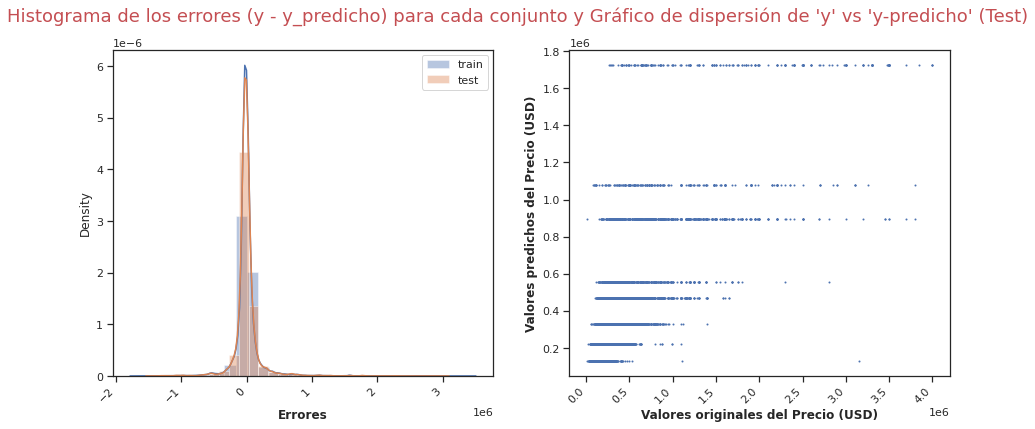

In [275]:
Aplicar_modelo(X_train, X_test, y_train, y_test, tree_model)

In [276]:
modelo = DecisionTreeRegressor(max_depth = 3)
y_hat = modelo.fit(X_train, y_train)
y_hat = modelo.predict(X_train)
SS_Residual = sum((y_train-y_hat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.5844333913686428 0.5844077432252195


Se puede ver una mejora respecto al Benchmarck. El rmse pasó de ~209000 a ~194000, sin embargo sigue siendo un valor bastante alto. También se puede apreciar una leve mejora en el gráfico de dispersión.

Para tratar de mejorarlo aún más se calculó la profundidad más óptima para el modelo

Text(0.5, 1.0, 'Rmse para distintos valores de profundidad máxima')

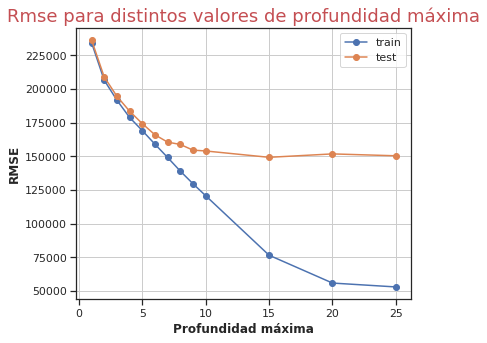

In [277]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))    
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Profundidad máxima", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos valores de profundidad máxima", fontsize = 18, color = "r")

Se eligió el valor 10. En comparación con el modelo de profundidad 9, no posee una diferencia significativa para el conjunto de Test, pero no sufre overfiting como si lo hace la profundidad 15.

In [278]:
tree_model = DecisionTreeRegressor(max_depth = 10)

Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 152639.77930403885


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



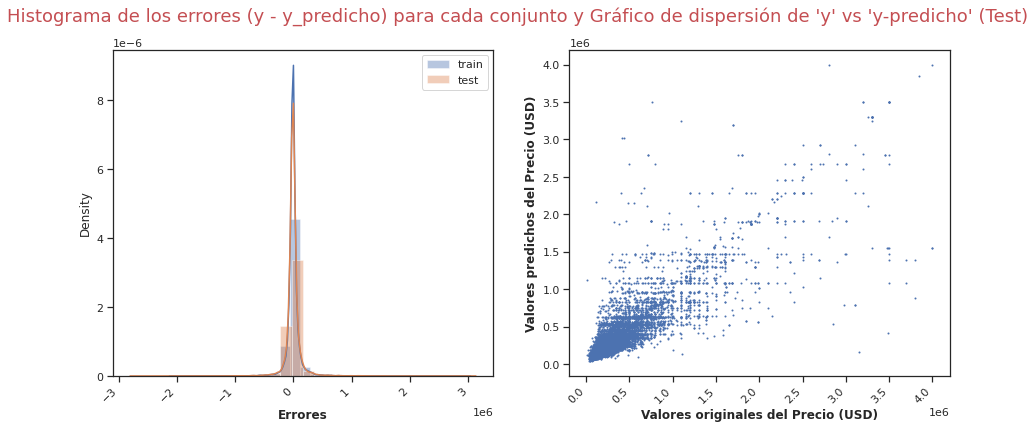

In [279]:
Aplicar_modelo(X_train, X_test, y_train, y_test, tree_model)

In [280]:
modelo = DecisionTreeRegressor(max_depth = 10)
y_hat = modelo.fit(X_train, y_train)
y_hat = modelo.predict(X_train)
SS_Residual = sum((y_train-y_hat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8351328504335352 0.8351226750820752


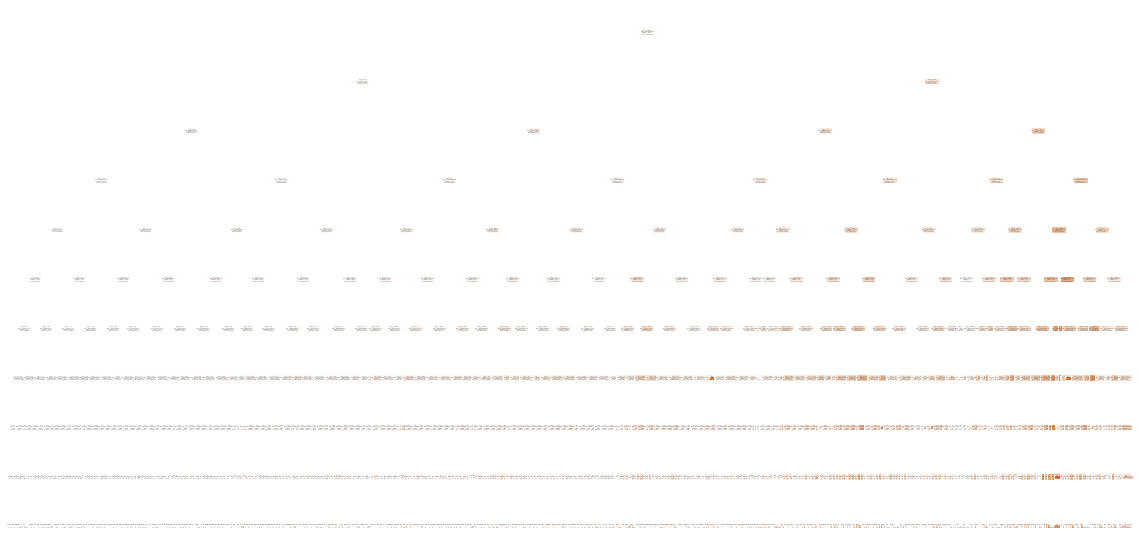

In [281]:
from sklearn import tree
plt.figure(figsize = (20,10))
tree.plot_tree(tree_model, filled = True)
plt.show()

Este nuevo modelo mejora levemente el rmse (de ~191000 a ~120000), pero se puede observar una mayor concentración de puntos sobre la diagonal del gráfico de dispersión.

A continuación de calculó la importancia de cada variable en el modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



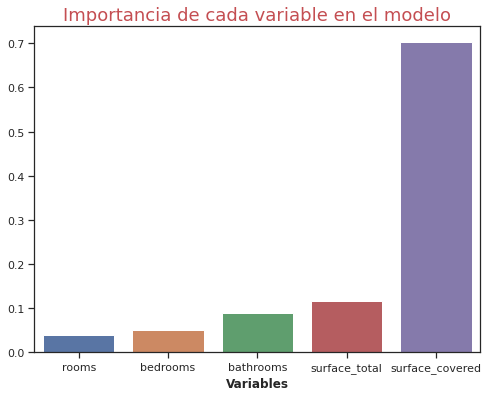

In [282]:
importances = tree_model.feature_importances_
columns = X.columns

plt.figure(figsize = (8, 6))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

Podemos ver que la mayor signitifcatividad para este modelo viene por parte 

###**Vecino más cercano**

A continuación se realizó el mismo procedimiento realizado para el modelo de árbol de decisión pero para el modelo de vecinos más cercanos. En primer lugar se evaluó el rendimiento del modelo utilizando 5 vecinos, luego se obtuvo el número de vecinos más óptimo y se volvió a evaluar su rendimiento.

In [283]:
KNN_model = KNeighborsRegressor(n_neighbors = 5)

Raíz del error cuadrático medio en Train: 121300.24049431273
Raíz del error cuadrático medio en Test: 155040.1332898459


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



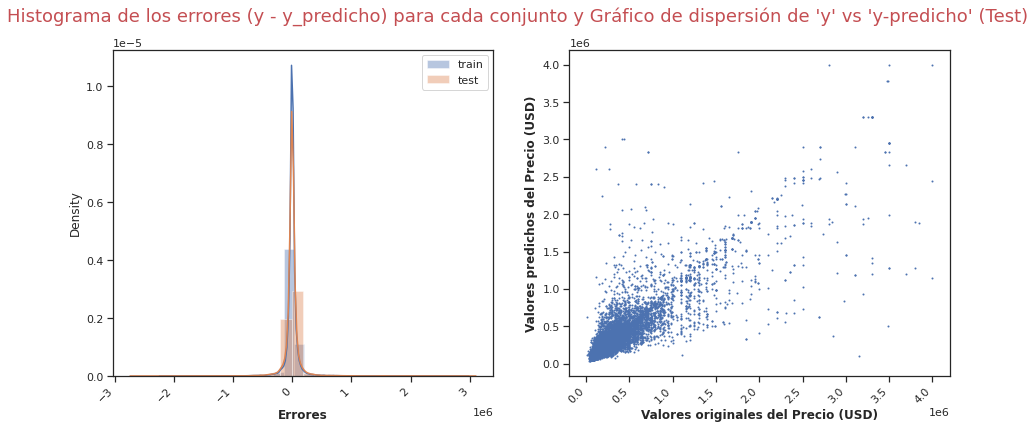

In [284]:
Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model)

In [285]:
KNN_model = KNeighborsRegressor(n_neighbors = 5)
KNN_model = KNN_model.fit(X_train, y_train)
y_hat = KNN_model.predict(X_train)
SS_Residual = sum((y_train-y_hat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8337576939918351 0.8337474337677965


Con este modelo se obtuvo un rendimiento intermedio al de los dos árboles de decisión.

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

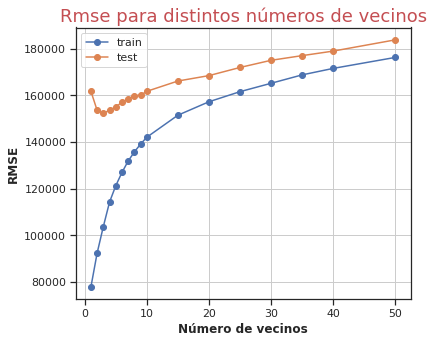

In [286]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
plt.figure(figsize = (6,5))          
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Se eligió en número 3 ya que es el que presenta menor rmse en el conjunto Test.

In [287]:
KNN_model = KNeighborsRegressor(n_neighbors = 3)

Raíz del error cuadrático medio en Train: 103804.20852724434
Raíz del error cuadrático medio en Test: 152317.82229037234


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



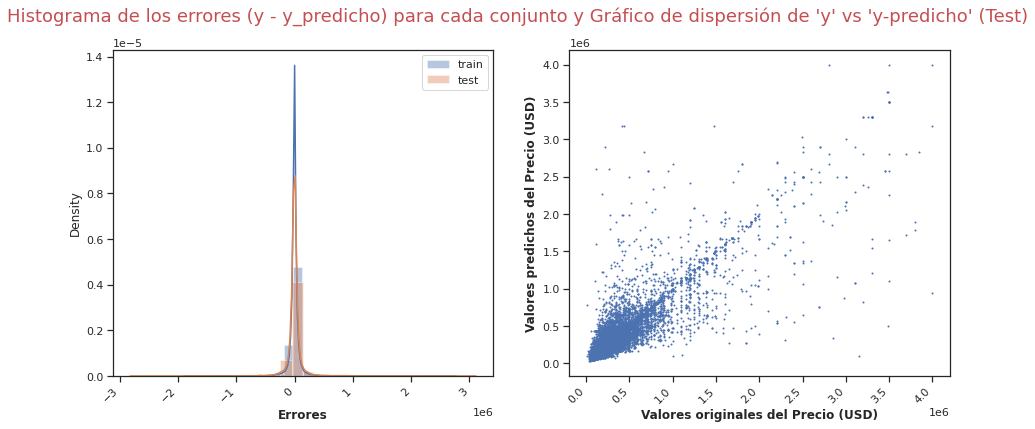

In [288]:
Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model)

In [289]:
KNN_model = KNeighborsRegressor(n_neighbors = 3)
KNN_model = KNN_model.fit(X_train, y_train)
y_hat = KNN_model.predict(X_train)
SS_Residual = sum((y_train-y_hat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8782558355018435 0.87824832163589


El rendimiento es similar del del árbol de decisión más óptimo, pero con un mayor overfiting.

Se volvió a calcular el número de vecinos más cercanos más optimo, pero ahora poniendo el párametro "weights" igual a "distancia"

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

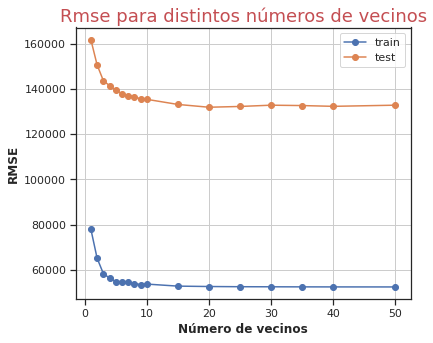

In [290]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k, weights = "distance")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

In [291]:
KNN_model_2 = KNeighborsRegressor(n_neighbors = 20, weights = "distance")

Raíz del error cuadrático medio en Train: 52669.175313692605
Raíz del error cuadrático medio en Test: 131956.1761786944


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



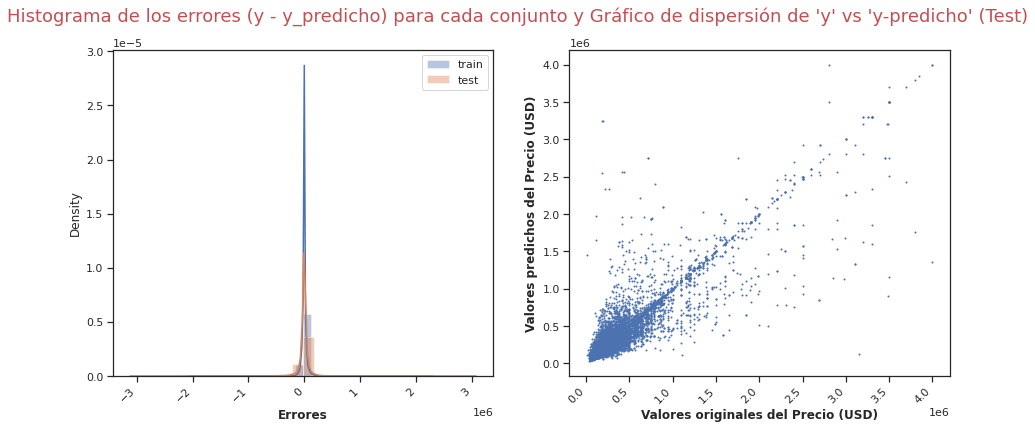

In [292]:
Aplicar_modelo(X_train, X_test, y_train, y_test, KNN_model_2)

Con este modelo se obtiene un rendimiento mucho mejor en cuanto al rmse, pero podemos observar que sufre mucho overfiting.

###**Incorporación de latitud y longitud**

Ahora vamos a incorporar las variables independientes "latitud" y "longitud" para observar si ayudan a mejorar los modelos ya realizados

In [293]:
seleccion_ML_2 = seleccion_ML[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]]

In [294]:
seleccion_ML_2 = seleccion_ML_2.dropna()

In [295]:
print(seleccion_ML_2.shape)

(76771, 8)


In [296]:
X_2 = seleccion_ML_2[["lat", "lon", "rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered"]]
y_2 = seleccion_ML_2["price"]

In [297]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.3, random_state = 42)

- Árbol de decisión

Se volvió a calcular la profundidad máxima, por las dudas de que haya cambiado al agregarle las nuevas variables

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

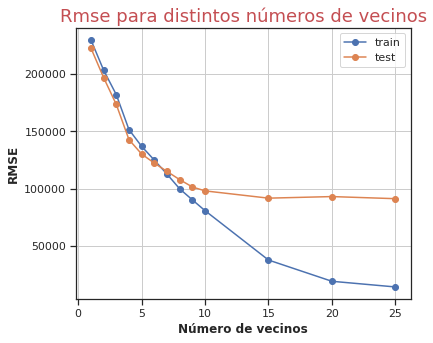

In [298]:
lista_rmse_train = []
lista_rmse_test = []
max_depths = [1,2,3,4,5,6,7,8,9,10,15,20,25]

for i in max_depths:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X2_train, y2_train)
    y2_train_pred = model.predict(X2_train)
    train_rmse = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    y2_test_pred = model.predict(X2_test)
    test_rmse = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(max_depths, lista_rmse_train,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Se mantiene la profundidad 10

In [299]:
tree_model2 = DecisionTreeRegressor(max_depth = 10)

Raíz del error cuadrático medio en Train: 80807.75991711914
Raíz del error cuadrático medio en Test: 98515.2370947275


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



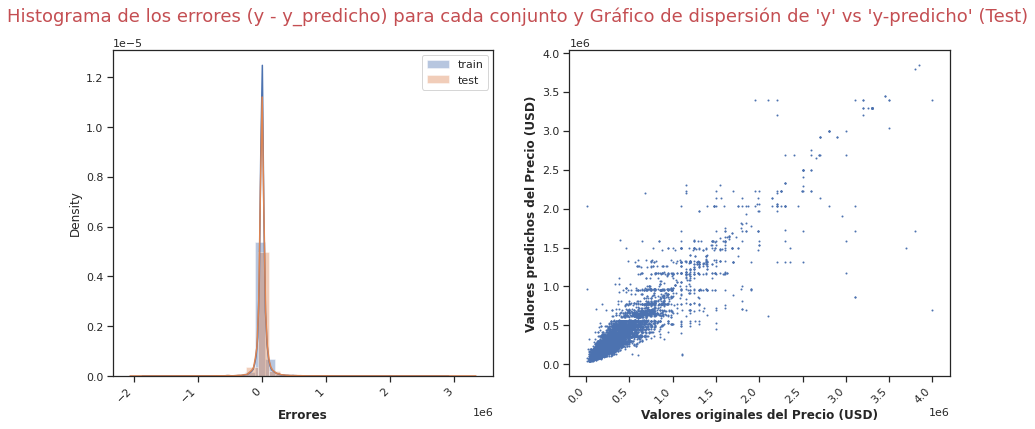

In [300]:
Aplicar_modelo(X2_train, X2_test, y2_train, y2_test, tree_model2)

Con este nuevo modelo se pudo obtener un rendimiento mucho mejor. El rmse obtenido con el árbol de decisión anterior era de ~152000 mientras que el obtenido con este modelo es de ~98000 y se puede ver la gran concentración de puntos en la diagonal del gráfico de dispersión. A su vez no presenta overfiting.

In [301]:
# Calculo del R cuadrado
modelo = DecisionTreeRegressor(max_depth = 10)
y_hat = modelo.fit(X2_train, y2_train)
y_hat = modelo.predict(X2_train)
SS_Residual = sum((y2_train-y_hat)**2)
SS_Total = sum((y2_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9221772946155617 0.9221724915157269


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



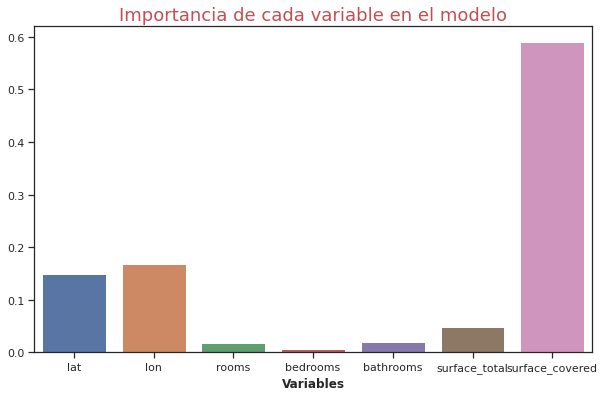

In [302]:
importances = tree_model2.feature_importances_
columns = X_2.columns

plt.figure(figsize = (10, 6))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

La superficie cubierta sigue siendo la variable más importante, pero la latitud y longitud presentan un importancia considerable.

En base a la importancia de cada variable, se probó un modelo más sencillo utilizando solo las variables que tienen mayor importancia para el modelo.

In [303]:
X_3 = seleccion_ML_2[["lat", "lon", "surface_total", "surface_covered"]]
y_3 = seleccion_ML_2["price"]

In [304]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size = 0.3, random_state = 42)

In [305]:
tree_model3 = DecisionTreeRegressor(max_depth = 10)

Raíz del error cuadrático medio en Train: 79860.96378797542
Raíz del error cuadrático medio en Test: 97970.59383221461


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



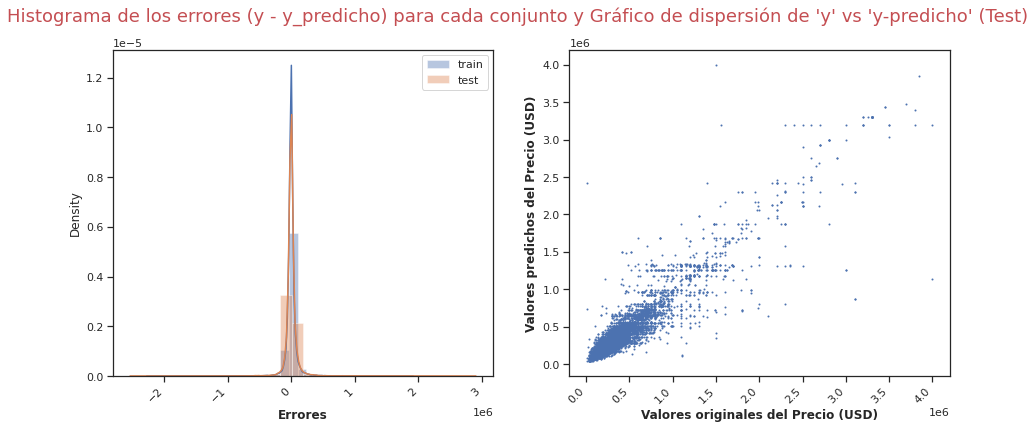

In [306]:
Aplicar_modelo(X3_train, X3_test, y3_train, y3_test, tree_model3)

Este nuevo modelo más sencillo, con solo 4 variables independientes presentó un rendimiento levemente más alto al anterior anterior (de ~98000 subió a ~99000).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



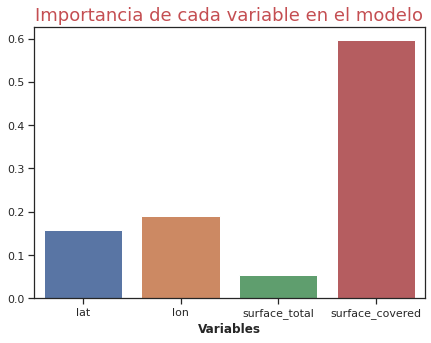

In [307]:
importances = tree_model3.feature_importances_
columns = X_3.columns

plt.figure(figsize = (7, 5))
sns.barplot(columns, importances)
plt.xlabel("Variables", fontweight = "black", fontsize = 12)
plt.title("Importancia de cada variable en el modelo", fontsize = 18, color = "r")
plt.show()

- Vecino más cercano

Se volvió a calcular el número de vecinos, por las dudas de que haya cambiado al agregarle las nuevas variables. No se utilizó la distancia para el parámetro "weights" debido al gran overfiting que producia.

Text(0.5, 1.0, 'Rmse para distintos números de vecinos')

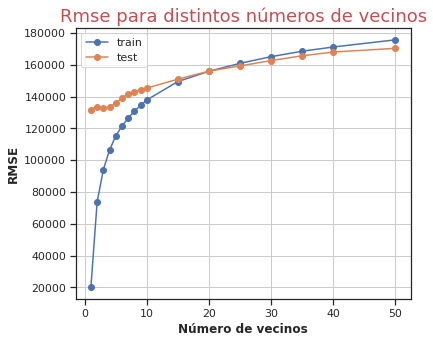

In [308]:
lista_rmse_train = []
lista_rmse_test = []
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(X2_train, y2_train)
    y2_train_pred = model.predict(X2_train)
    train_rmse = np.sqrt(mean_squared_error(y2_train, y2_train_pred))
    y2_test_pred = model.predict(X2_test)
    test_rmse = np.sqrt(mean_squared_error(y2_test, y2_test_pred))
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)

plt.figure(figsize = (6,5))
plt.plot(k_vecinos, lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.xlabel("Número de vecinos", fontweight = "black", fontsize = 12)
plt.ylabel("RMSE", fontweight = "black", fontsize = 12)
plt.title("Rmse para distintos números de vecinos", fontsize = 18, color = "r")

Se mantiene el número 3

In [309]:
KNN_model2 = KNeighborsRegressor(n_neighbors = 3)

Raíz del error cuadrático medio en Train: 94074.99324103778
Raíz del error cuadrático medio en Test: 132671.26456873622


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



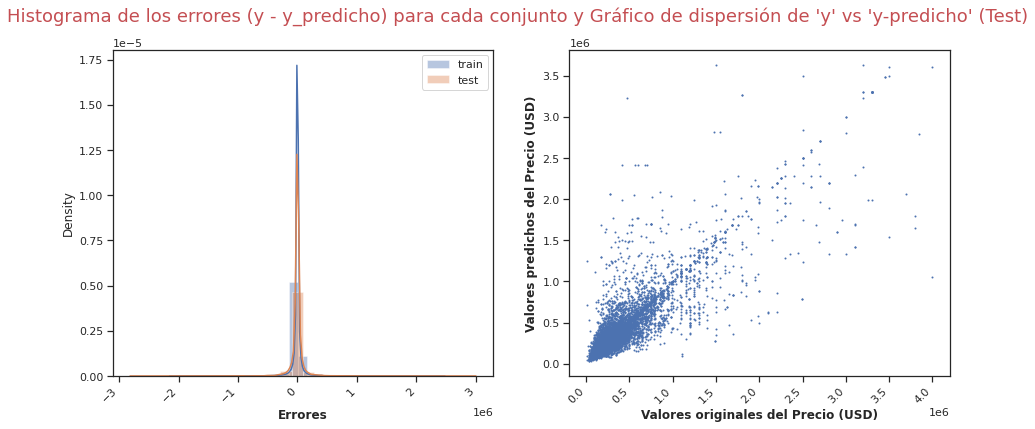

In [310]:
Aplicar_modelo(X2_train, X2_test, y2_train, y2_test, KNN_model2)

In [311]:
KNN_model = KNeighborsRegressor(n_neighbors = 3)
KNN_model = KNN_model.fit(X2_train, y2_train)
y_hat = KNN_model.predict(X2_train)
SS_Residual = sum((y2_train-y_hat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9052512298003892 0.9052453820493986


Se obtuvo una disminución importante del rmse con respecto al modelo anterior de vecinos más cercanos, pasó de ~152000 a ~132000, pero sufre bastante overfiting.

##**5 Conclusión**

Podríamos decir que el mejor modelo para la problemática planteada es el modelo de árbol de decisión, con una profundidad máxima igual a 10. En cuanto a las variables utilizadas, hemos visto que utilizando solo las variables "latitud", "longitud", "superficie total" y "superficie cubierta" se obtiene un rendimiento muy similir al modelo más complejo que utiliza todas las variables (7 en total). Esto probablemente se deba a la gran relación que presentan las variables entre si (excepto latitud y longitud). Se podría pensar que la superficie cubierta engloba dentro de ella el número de ambientes, habitaciones y baños, ya que a media que aumenta el número de estos últimos, por lógica se tiene mayor superficie cubierta.

También hay que tener en cuenta que con el modelo más óptimo obtenido, los valores de rmse siguen siendo bastante elevados, por lo cual hay que considerar evaluar diferentes variables independientes que no estén relacionadas con las utilizadas, pero que pueden estar bastante relacionadas con el precio de una propiedad, como ser la presencia de piscinas, balcones, terrazas, etc.

La cantidad de combinaciones de hiper-parámetros y variables X es infinita, por lo que quizás haya alguna alternativa que supere a los modelos presentados; además de alguna modelización de otra clase.

In [312]:
resumen = {"Modelo":["Benchmark (arbol de decisión)","Benchmark (Regresión Lineal)", "Árbol de decisión", "Árbol de decisión", "Vecinos más cercanos", "Vecinos más cercanos"], 
           "Hiper-parámetros":["profundidad máxima = 8","profundidad máxima = 1", "profundidad máxima = 10", "profundidad máxima = 10", "número de vecinos = 3", "número de vecinos = 3"], 
           "Variables X": [1,2, 5, 7, 5, 7], "RMSE (test)":["~209000","~218000", "~153000", "~98000", "~152000", "~132000"], "Overfiting":["No","No", "No", "No", "Sí", "Sí"], "R cuadrado": [51.7,47.3, 83.5, 92.2, 87.8, 90.5]}
pd.DataFrame(resumen)

Modelo  ... R cuadrado
0  Benchmark (arbol de decisión)  ...       51.7
1   Benchmark (Regresión Lineal)  ...       47.3
2              Árbol de decisión  ...       83.5
3              Árbol de decisión  ...       92.2
4           Vecinos más cercanos  ...       87.8
5           Vecinos más cercanos  ...       90.5

[6 rows x 6 columns]